# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5) * np.sqrt((x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2.0 * np.pi * x[0]) + np.cos(2.0 * np.pi * x[1]))
    return -20.0 * np.exp(arg1) - np.exp(arg2) + 20.0 + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [71]:
strategies1 = ['best1bin',
            'best1exp',
            'rand1exp',
            'randtobest1exp',
            'currenttobest1exp',
            'best2exp',
            'rand2exp',
            'randtobest1bin',
            'currenttobest1bin',
            'best2bin',
            'rand2bin',
            'rand1bin']
updates1 = ['immediate', 'deferred']


strategies = {}
popsizes = {}
tols = {}
mutations = {}
recombinations = {}
updates = {}
    
for i in range(len(strategies1)):
    strategies[i] = (differential_evolution(ackley, bounds, strategy=strategies1[i], seed=42 )['nit'])
    strategies[strategies1[i]] = strategies.pop(i)

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
    popsizes[i] = (differential_evolution(ackley, bounds, popsize=i, seed=42 )['nit'])
    
for i in [0.001, 0.005, 0.01, 0.05, 0.1]:
    tols[i] = (differential_evolution(ackley, bounds, tol=i, seed=42 )['nit'])

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    mutations[i] = (differential_evolution(ackley, bounds, mutation=i, seed=42 )['nit'])
    
for i in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    recombinations[i] = (differential_evolution(ackley, bounds, recombination=i, seed=42 )['nit'])
    
for i in range(len(updates1)):
    updates[i] = (differential_evolution(ackley, bounds, updating=updates1[i], seed=42 )['nit'])
    updates[updates1[i]] = updates.pop(i)

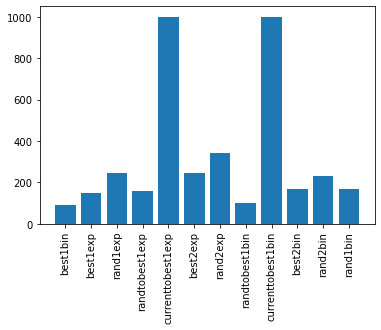

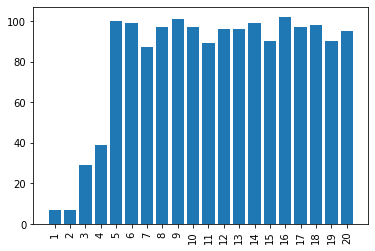

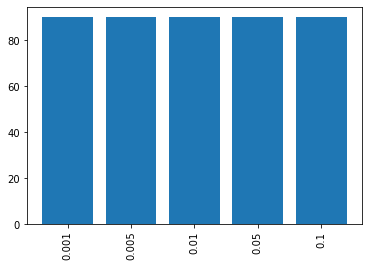

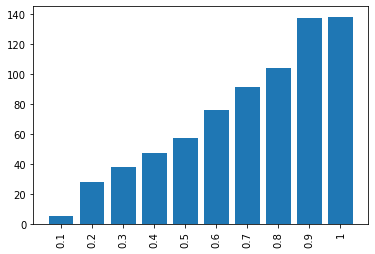

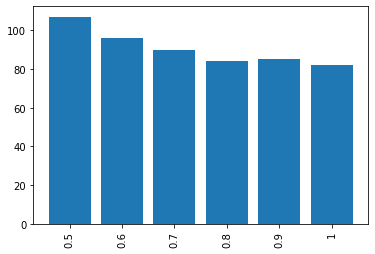

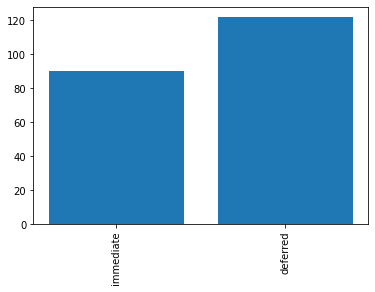

In [73]:
import matplotlib.pyplot as plt

for D in [strategies, popsizes, tols, mutations, recombinations, updates]:
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
    plt.show()

In [81]:
minnit = differential_evolution(ackley, bounds, strategy='best1bin', popsize=1, tol=0.01, mutation=0.001, recombination=1, seed=42, updating='immediate')
minnit

     fun: 1.2280235939243767e-08
     jac: array([0.55387019, 2.28810748])
 message: 'Optimization terminated successfully.'
    nfev: 178
     nit: 1
 success: True
       x: array([-3.95806054e-09,  1.78445686e-09])